In [1]:
from preprocessing import Preprocessing
import matplotlib.pyplot as plt

In [2]:
test_file_path = 'test-data/raw_scan.nii.gz'

In [3]:
# Preprocessing class is a wrapper for several functionalities of ANTsPyX and ANTsPyNet packages

# the class has several static methods for I/O of .nii (.gz) files (wrappers of ants functions)

# load file from path to ANTs image:
img = Preprocessing.read_img(test_file_path)
img

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 192, 192)
	 Spacing    : (1.2, 1.25, 1.25)
	 Origin     : (-109.2048, -96.6, 364.9398)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

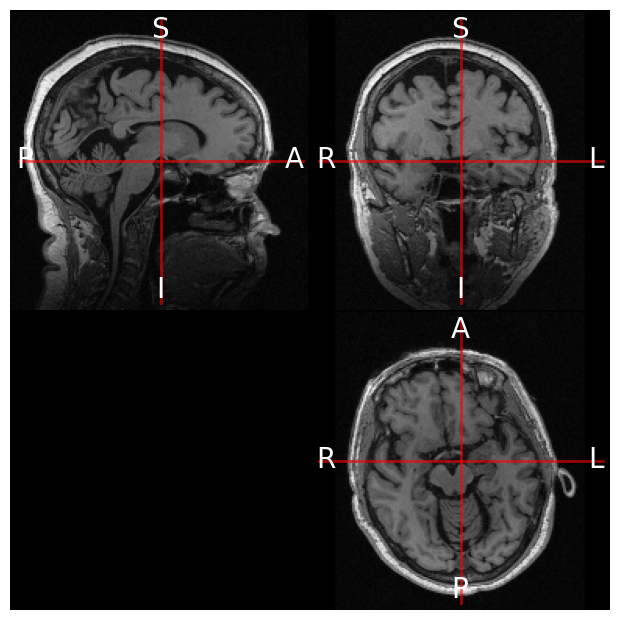

In [4]:
# plot orthogonal views of the image
Preprocessing.show_img(img)

In [5]:
# save the image
Preprocessing.save_img("test-data/raw_scan.nii.gz", img)

In [6]:
# IMPORTANT: ANTs image are very nice to used, they can be casted to numpy arrays
img_numpy = img.numpy()
print(type(img_numpy), img_numpy.shape)

<class 'numpy.ndarray'> (160, 192, 192)


In [7]:
# more complex operations are done using an instance of Preprocessing:
prep = Preprocessing()

In [8]:
# magnetic field bias correction:
img_bias_corrected = prep.bias_correction(img)

# brain extraction using pretrained NNs:
img_brain = prep.brain_extract(img_bias_corrected, brain_threshold=0.9)
# brain_threshold parameter is used to create a binary mask for a brain
# value around (up to 0.99?) 0.9 gives results similar to an output of BET2 algorthm from FSL package

2023-04-18 18:15:36.593984: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


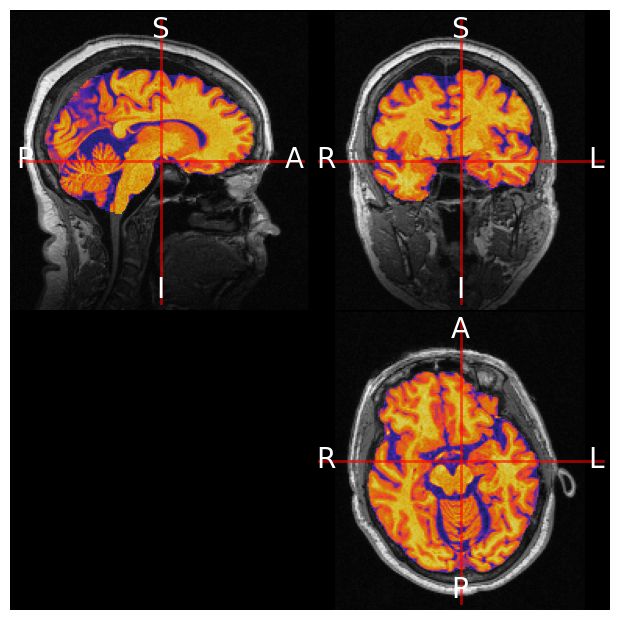

In [9]:
# show_img method can show overlays
prep.show_img(img, img_brain)

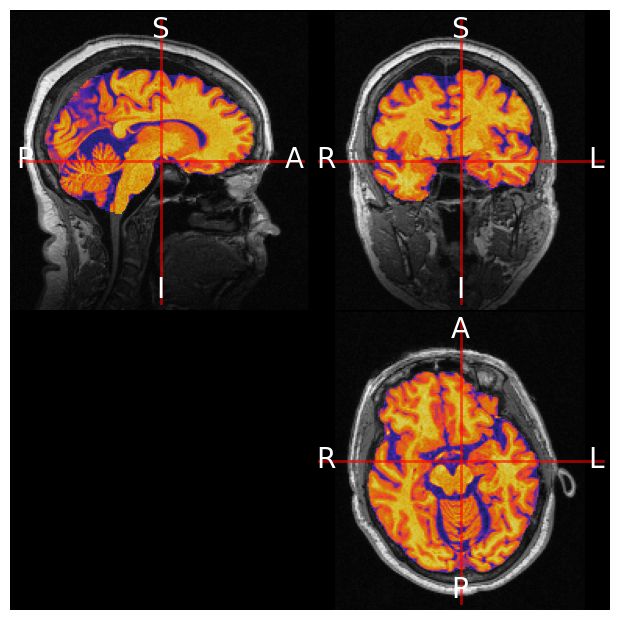

In [10]:
# there are two methods for performing bias correction and brain extraction at once

# preprocess_structural_img takes ANTs img as an input
img_brain = prep.preprocess_structural_img(img, brain_threshold=0.9, show_overlay=True)



In [8]:
# preprocess_structural_img_path takes a path to NiFTi file
# it can also save .nii.gz files containing:
# * bias corrected image
# * brain image

# both methods can return numpy arrays instead of ANTs images

img_brain1 = prep.preprocess_structural_img_path(test_file_path, save_brain_img=True, save_bias_corrected=True,
                                                 show_overlay=False, brain_threshold=0.9, to_numpy=True)
print(type(img_brain1), img_brain1.shape)

test-data raw_scan .nii.gz
test-data/raw_scan_bias_corrected.nii.gz


2023-04-18 18:19:09.725799: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


<class 'numpy.ndarray'> (160, 192, 192)


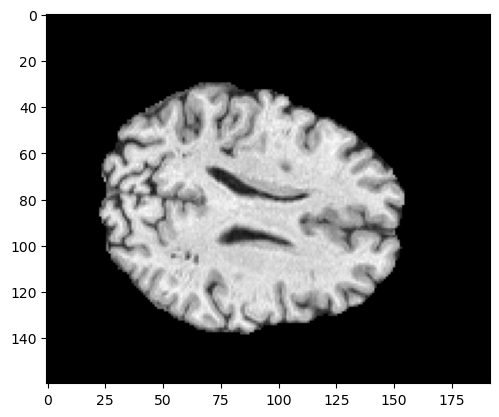

In [12]:
fig, ax = plt.subplots(facecolor='white')
ax.imshow(img_brain1[:,:, 120], cmap='gray')

In [13]:
# In general ANTs tools rune quite fast compared to FSL routines
%timeit prep.preprocess_structural_img(img, brain_threshold=0.9, show_overlay=False)

5.95 s ± 59.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
